In [1]:
import numpy as np
from scipy.ndimage import zoom
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10., 6.)

In [2]:
dg_rolling = np.load('dg-rolling-sentiment.npy')
sm_rolling = np.load('sm-rolling-sentiment.npy')

In [3]:
len(dg_rolling)

2964

In [4]:
len(sm_rolling)

1716

In [5]:
max_length = max(len(dg_rolling), len(sm_rolling))

In [6]:

dg_zoom_rate = max_length / len(dg_rolling)
sm_zoom_rate = max_length / len(sm_rolling)

dg_rolling_zoomed = zoom(dg_rolling, dg_zoom_rate)
sm_rolling_zoomed = zoom(sm_rolling, sm_zoom_rate)

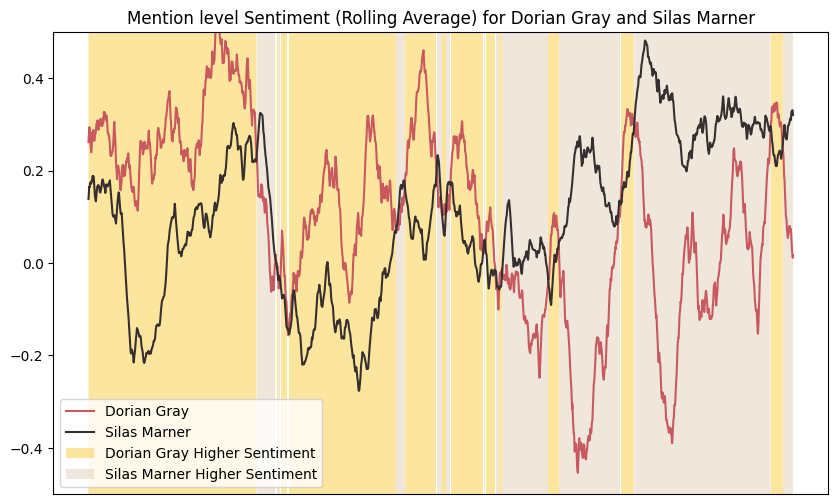

In [15]:
x = np.arange(max_length)

plt.plot(x, dg_rolling_zoomed, label='Dorian Gray', color='#C9595F')
plt.plot(x, sm_rolling_zoomed, label='Silas Marner', color='#372F2F')


plt.fill_between(
    x, 
    -0.5,
    0.5,
    where=dg_rolling_zoomed>sm_rolling_zoomed,
    facecolor='#FBCE3F',
    alpha=0.5,
    label='Dorian Gray Higher Sentiment'
)
plt.fill_between(
    x, 
    -0.5,
    0.5,
    where=dg_rolling_zoomed<=sm_rolling_zoomed,
    facecolor='#E0D0B8',
    alpha=0.5,
    label='Silas Marner Higher Sentiment',
)

plt.title('Mention level Sentiment (Rolling Average) for Dorian Gray and Silas Marner')
plt.legend()
plt.ylim(-0.5, 0.5)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig('dg-vs-sm-rolling-sentiment.png')
plt.show()
